<a href="https://colab.research.google.com/github/ivanachen1/ScrabblePython/blob/main/ApylabradosModuleLogic_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Fichas():

  puntos = {"A":1,"B":3,"C":3,"D":2,"E":1,"F":4,"G":2,"H":4,"I":1,
            "J":8,"K":5,"L":1,"M":3,"N":1,"O":1,"P":3,"Q":10,"R":1,
            "S":1,"T":1,"U":1,"V":4,"W":4,"X":8,"Y":4,"Z":10} 

  def __init__(self):
    """
    El atributo de la clase Fichas es 
    la letras. Mi objeto es la letra
    """
    self.letras = []
    


  def agregar_ficha(self,caracter):

    """
    Es un metodo de instancia.
    Args:
    caracter = Es el caracter a unir
    
    Return:
    None
    """

    self.letras.append(caracter)
  
  def agregar_fichas(self,caracter,numero_repeticiones):
    """
    Es un metodo de instancia.
    Args:
      caracter = Es el tipo de ficha a crear
      numero_repeticiones = Es la cantidad de veces a crear
      de la ficha indicada
      
    Return:
      None
    """
    for c in range(numero_repeticiones):
      self.agregar_ficha(caracter)
    
  def mostrar_fichas(self):
    import pandas as pd
    """
    muestra las fichas que hay en el objeto letras creado,clasificadas
    por caracter y por cantidad
    """
    #conteo_fichas = []

    #for ficha in set(self.letras):
    #  cuenta = self.letras.count(ficha)
    #  conteo_fichas.append([ficha,cuenta])

    #conteo_fichas = pd.DataFrame(conteo_fichas)
    #conteo_fichas = conteo_fichas.sort_values(by = 0 ,axis = 0, ascending = True)
    
    tabla_de_frecuencia_fichas = self.get_frecuencia()
    tabla_de_frecuencia_fichas.mostrar_frecuencias()



    #return conteo_fichas
      
  def crear_fichas(self):
    """
    El metodo crea el universo de fichas del juego
    descrito en el archivo externo que se indique.
    Este universo crea una por una a las fichas que estan disponibles 
    para ser repartidas al jugador y las almacena en la variable
    letters por el metodo agregar_fichas
    """
    import pandas as pd
    archivo_path = "/content/drive/MyDrive/Colab Notebooks/Python de la A a la Z/Proyecto Final/bag_of_pawns.csv"
    archivo = pd.read_csv(archivo_path) 

    for row in archivo.itertuples():
      self.agregar_fichas(row[1],row[2]) 
  
  def ver_letras(self):
    """
    Metodo de control creado para ver el contenido de letters
    """
    print(self.letras)

  def tomar_ficha_aleatoria(self):
    """
    Este metodo toma una ficha aleatoria del universo de fichas guardado
    en la variable de clase letras y la descuenta del mismo.
    """
    import numpy as np

    ficha_elegida = np.random.choice(self.letras)
    self.letras.remove(ficha_elegida)
  
    return ficha_elegida
  
  def get_frecuencia(self):
    """
    Muestra la frecuencia de aparicion de cada ficha. Retorna un objeto de la 
    clase Frecuencia.
    """
    objeto_tabla_frecuencias = Tabla_de_Frecuencias()

    for caracter in self.letras:
      objeto_tabla_frecuencias.actualizar_frecuencia(caracter)
    
    return objeto_tabla_frecuencias

  def tomar_ficha(self,ficha):
    """
    Toma por parametro una ficha y la saca del objeto de la clase
    fichas
    """
    if ficha in self.letras:
      self.letras.remove(ficha)
    

  
  def obtener_total_fichas(self):
    """
    Obtiene el total de fichas de un objeto
    de la clase Fichas
    """
    return len(self.letras)
  
  @staticmethod
  def obtener_puntos(letra):
    """
    Este metodo recibe una letra y devuelve la puntuación definida en la 
    variable de clase puntos
    """
    letra = letra.upper()
  
    return Fichas.puntos[letra]

  @staticmethod
  def mostrar_puntos_fichas():
    """
    Este metodo muestra los puntos que otorgan las fichas consultadas siendo
    las del jugador o la del tablero
    """
    puntos = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"] 
    
    for letra in puntos:
      if Fichas.puntos[letra] == 1:
        print("La ficha {} otorga 1 punto".format(letra))
      else:
        print("La ficha {} otorga {} puntos".format(letra,Fichas.puntos[letra]))
  

class Palabra():
  def __init__(self):
    self.palabra = []
  
  def __str__(self):
    palabra_print = ""
    for i in self.palabra:
      palabra_print = palabra_print + i
    return palabra_print

  def convert_palabra_to_string(self):
    palabra_print = ""
    for i in self.palabra:
      palabra_print = palabra_print + i
    return palabra_print
 
  
  def palabras_iguales(self,segunda_palabra):
    """
    Compara si el atributo palabra del objeto primera_palabra
    es igual al atributo palabra del objeto segunda_palabra

    Args:
      segunda_palabra = Es un objeto de la clase Palabra
    Return:
      True en caso de ser verdadero y False en caso de ser falso
    """
    assert type(segunda_palabra) == type(Palabra()), "La segunda palabra no pertenece a la clase Palabra"

    if self.palabra == segunda_palabra.palabra:
      return True   
    else:
      return False
  
  
  def es_vacia(self):

    """
    Verifica si una palabra es vacia o tiene
    caracteres
    """
    
    assert type(self) == type(Palabra()) , "El parametro pasado no es un objeto de la clase palabra"
    resultado = False

    if len(self.palabra) == 0:
      resultado = True
    else:
      resultado = False
    
    return resultado
  
  @classmethod
  def leer_palabra(cls):
    """
    Permite leer una palabra tipiada por el usuario con el comando
    input y la convierte en un objeto de la clase
    """
    palabra = input("Por favor, introduzca una palabra: ")
    palabra = palabra.upper()

    nuevo_objeto_palabra = Palabra()

    for caracter in palabra:
      nuevo_objeto_palabra.palabra.append(caracter)
       
    return nuevo_objeto_palabra
  
  @staticmethod
  def leer_palabra_desde_archivo(archivo):
    """
    Este metodo recibe una palabra del diccionario por el metodo readline 
    y la transforma a un objeto de la clase palabra.
    """

    palabra = Palabra()
    archivo_palabra = archivo.readline()
    
    for caracter in archivo_palabra[:-1]:
        #accedo al atributo palabra del objeto palabra
        #de la clase Palabra
      palabra.palabra.append(caracter)
  

    return palabra

  def get_frecuencia_palabra(self):
    """
    Muestra la frecuencia de aparicion de cada ficha
    """

    objeto_clase_frecuencias = Tabla_de_Frecuencias()

    for caracter in self.palabra:
      objeto_clase_frecuencias.actualizar_frecuencia(caracter)
    
    return objeto_clase_frecuencias
  
  def longitud_palabra(self):
    """
    Esta funcion me retorna la longitud de la palabra
    """

    return len(self.palabra)

class Diccionario():

  path_del_archivo = "/content/drive/MyDrive/Colab Notebooks/Python de la A a la Z/Proyecto Final/dictionary.txt"

  @staticmethod
  def verificar_existencia_palabra_diccionario(palabra):
    """
    Comprueba si la palabra suministrada por el jugador esta presente o no en 
    el diccionario
    Args:
      palabra = La palabra a comprobar
    Return:
      True en caso de que esté o False en caso de que no este
    """

    with open(Diccionario.path_del_archivo,mode = "r") as lector:

      palabra_diccionario = Palabra.leer_palabra_desde_archivo(lector)
    
      while (not palabra_diccionario.es_vacia() and not palabra.palabras_iguales(palabra_diccionario)):
        palabra_diccionario = Palabra.leer_palabra_desde_archivo(lector)
      
      if palabra.es_vacia() and not palabra.palabras_iguales(palabra_diccionario):
        print("La palabra no se encuentra en el diccionario")
        return False
        
      else:
        return True

  @staticmethod
  def mostrar_posibles_palabras(objeto_ficha_del_jugador):
    """
    Muestra las posibles palabras que se pueden formar con las fichas
    que dispone el jugador
    Logica del algoritmo:
    1) Convierto las fichas del jugador a un objeto fichas.
    2) Accedo al archivo txt y uso la funcion validar palabra que en primer lugar
    lee una palabra del txt y verifica si esta en el diccionario.
    3) Paso la palabra a un objeto frecuencias asi puedo comparar las fichas del jugador 
    con la palabra del diccionario y si la palabra es un subconjunto de las fichas la puedo
    armar
    """

    #Convierto el objeto ficha en un objeto clase frecuencia asi lo comparo con las palabras
    
    frecuencia_fichas = objeto_ficha_del_jugador.get_frecuencia()

    lista_de_posibles_palabras = []

    with open(Diccionario.path_del_archivo, mode = "r") as lector:
      
      palabra = Palabra.leer_palabra_desde_archivo(lector)
      palabra_string = palabra.convert_palabra_to_string()

      contador = 0
      while palabra.es_vacia() == False:
        objeto_frecuencia_palabra = palabra.get_frecuencia_palabra()
        if Tabla_de_Frecuencias.es_subconjunto_de(objeto_frecuencia_palabra,frecuencia_fichas) == True:
          if contador != 5:
            lista_de_posibles_palabras.append(palabra_string)
            print(palabra,end = "    ")
            contador += 1
          else:
            contador = 0
            lista_de_posibles_palabras.append(palabra_string)
            print(palabra)       
          
        palabra = Palabra.leer_palabra_desde_archivo(lector)
        palabra_string = palabra.convert_palabra_to_string()

    return lista_de_posibles_palabras

  @staticmethod
  def recolectar_posibles_palabras(objeto_ficha_del_jugador):
    """
    funcion derivada de la anterior
    """

    #Convierto el objeto ficha en un objeto clase frecuencia asi lo comparo con las palabras
    
    frecuencia_fichas = objeto_ficha_del_jugador.get_frecuencia()

    with open(Diccionario.path_del_archivo, mode = "r") as lector:
      
      palabra = Palabra.leer_palabra_desde_archivo(lector)

      lista_de_posibles_palabras = []

      while palabra.es_vacia() == False:
        objeto_frecuencia_palabra = palabra.get_frecuencia_palabra()
        if Tabla_de_Frecuencias.es_subconjunto_de(objeto_frecuencia_palabra,frecuencia_fichas) == True:
          lista_de_posibles_palabras.append(palabra)           
      
        palabra = Palabra.leer_palabra_desde_archivo(lector)     


    return lista_de_posibles_palabras

  @staticmethod
  def mostrar_posibles_palabras_plus(objeto_fichas,caracter,lista_palabras_usadas):
    """ 
    Este metodo toma las fichas del caracter del jugador y un caracter. La idea es
    buscar todas las palabras que se puedan formar con ambos argumentos juntos
    y mostrarlas.
    """

    #convierto el objeto fichas en objeto frecuencias
    
    
    frecuencia_fichas = objeto_fichas.get_frecuencia()


    #uso la funcion actualizar frecuencias para incorporar al caracter
    #La tabla de frecuencias tiene todas las letras del abecedario por defecto en cero

    frecuencia_fichas.actualizar_frecuencia(caracter)

    nuevo_objeto_fichas = frecuencia_fichas.convert_objeto_frecuencia_fichas()

    ################################################################################

    with open(Diccionario.path_del_archivo, mode = "r") as lector:
      
      palabra = Palabra.leer_palabra_desde_archivo(lector)
      palabra_string = palabra
      lista_de_posibilidades = []
      
      contador = 0
      while palabra.es_vacia() == False:
        if palabra_string not in lista_palabras_usadas:
          #verifico que no me sugiera una palabra que ya escribi en el tablero
          objeto_frecuencia_palabra = palabra.get_frecuencia_palabra()
          if (Tabla_de_Frecuencias.es_subconjunto_de(objeto_frecuencia_palabra,frecuencia_fichas) == True) and (caracter in palabra.palabra) and (palabra.longitud_palabra() > 1):
            if contador != 5:
              print(palabra,end = "    ")
              lista_de_posibilidades.append(palabra)
              contador += 1
            else:
              contador = 0
              print(palabra)
              lista_de_posibilidades.append(palabra)
            
          palabra = Palabra.leer_palabra_desde_archivo(lector)
          palabra_string = palabra

    return lista_de_posibilidades      

  @staticmethod
  def lista_completa_palabras(objeto_fichas,objeto_tablero):
    """ 
    Este metodo toma las fichas del jugador y las del tablero, las une
    y luego crea una lista de todas las palabras posibles a construir con esos
    ingredientes
    Es un metodo de la clase diccionario
    """
    
    lista_de_posibles_palabras = []
    
    
    # primer for para juntar los caracteres del tablero
    lista_de_caracteres = []

    for i in range(15):
      for j in range(15):
        if objeto_tablero.tablero[i,j] == " ":
          continue
        else:
          caracter = objeto_tablero.tablero[i,j]
          lista_de_caracteres.append(caracter) 
        
    frecuencia_fichas = objeto_fichas.get_frecuencia()
    frecuencia_fichas_copia = frecuencia_fichas

    for caracter in lista_de_caracteres:
      
      frecuencia_fichas_copia.actualizar_frecuencia(caracter)
      nuevo_objeto_fichas = frecuencia_fichas_copia.convert_objeto_frecuencia_fichas()

      with open(Diccionario.path_del_archivo, mode = "r") as lector:
            
        palabra = Palabra.leer_palabra_desde_archivo(lector)

        while palabra.es_vacia() == False:
          objeto_frecuencia_palabra = palabra.get_frecuencia_palabra()
          if Tabla_de_Frecuencias.es_subconjunto_de(objeto_frecuencia_palabra,frecuencia_fichas) == True:   
            if (caracter in palabra.palabra) and (palabra.longitud_palabra() > 1):
                palabra2 = palabra.convert_palabra_to_string()               
                lista_de_posibles_palabras.append(palabra2)
                               
          palabra = Palabra.leer_palabra_desde_archivo(lector)
              
      frecuencia_fichas_copia = frecuencia_fichas

    return lista_de_posibles_palabras

class Tabla_de_Frecuencias():
  """
  nos permite obtener de cada una de las palabras
  la cantidad de veces que aparece cada letra
  """

  def __init__(self):
    """
    inicializa las letras del juego en cero por eso va a tener el atributo
    letras que son todas las letras que posee el juego y las frecuencias en cero
    """
    self.letras = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
    self.frecuencias = [0] * 26

  def mostrar_frecuencias(self):
    """
    Este metodo muestra la cantidad de veces que está presente una letra,
    Excluyendo a las que valen cero.
    """
    import pandas as pd
    tabla_frecuencias_completa = tuple(zip(self.letras,self.frecuencias))
    tabla_frecuencias_a_mostrar = []
    for letra,cantidad in tabla_frecuencias_completa:
      if cantidad == 0:
        continue 
      else:
        tabla_frecuencias_a_mostrar.append((letra,cantidad))
      
    tabla_frecuencias_mostrada = pd.DataFrame(tabla_frecuencias_a_mostrar)
    tabla_frecuencias_mostrada.columns = ["Letra","Cantidad"]

    return print(tabla_frecuencias_mostrada)

  
  
  @staticmethod
  def es_subconjunto_de(primera_tabla_de_frecuencias,segunda_tabla_de_frecuencias):
    """
    Toma 2 objetos de la clase Tabla de Frecuencias y determina si el primero
    es un subconjunto del segundo. Para esto las letras del primer objeto
    se repiten igual o menos veces que en el segundo objeto.
    """
    
    # Creo un objeto de tipo lista con letra y valor para cada una de las tablas de frecuencia y excluyo los ceros

    for idx in range(len(primera_tabla_de_frecuencias.frecuencias)):
      if primera_tabla_de_frecuencias.frecuencias[idx] > segunda_tabla_de_frecuencias.frecuencias[idx]:
        return False

    return True
 
  def actualizar_frecuencia(self,c):
    """
    Este metodo actualiza la tabla de frecuencias
    sumando 1 al caracter pasado por parametro
    """

    #busco la posicion de la letra ya que tengo una lista de tuplas
    # al encontrar esa posicion ya se a que valor debo incrementar en una unidad

    indice = self.letras.index(c)
    
    self.frecuencias[indice] += 1
  
  def convert_objeto_frecuencia_fichas(self):
    """
    Este metodo me permite convertir un objeto frecuencia a un objeto fichas.
    Para esto quito del tablero de frecuencias las palabras que no tengan fichas
    y obtengo una lista de tuplas de (letra,cantidad). A esa lista hago la 
    multiplicacion y obtengo ficha por ficha.
    """
    
    # Lo que hago en esta funcion es crear el zip de letra, frecuencia

    lista_a_conservar = []

    objeto_fichas = Fichas()

    lista = list(zip(self.letras,self.frecuencias))

    for letra,cantidad in lista:
      if cantidad == 0:
        continue 
      else:
        for i in range(cantidad):
          lista_a_conservar.append((letra))

    for caracter in lista_a_conservar:
      objeto_fichas.letras.append(caracter)  

    
    return objeto_fichas

class Tablero():

  puntuacion = 0
  
  """
  Es la clase tablero donde estarán dispuestas todas las
  fichas
  """

  def __init__(self):
    import numpy as np
    self.tablero = np.array([[" "]*15]*15)
    self.palabras_totales = 0
    self.total_fichas = 0
  
  def mostrar_tablero(self):
    from tabulate import tabulate
    vista = print(tabulate(self.tablero,tablefmt = "fancy_grid"))
    return vista

  def colocar_palabra(self,fichas_del_jugador,palabra,coordenada_x,coordenada_y,direccion):
    """
    Este metodo coloca la palabra en el tablero en la posicion
    definida y en la orientación tambien definida por el jugador.
    Además quita las letras usadas del jugador de su conjunto de fichas
    """

    import numpy as np
    if len(direccion) > 1 or len(direccion) == 0 or type(direccion) != type("s"):
      return "Redefina la direccion"       

    direccion = direccion.upper()

    for letra in palabra.palabra:
      if self.tablero[coordenada_x,coordenada_y] == " ":
        self.tablero[coordenada_x,coordenada_y] = letra
        
        Tablero.puntuacion += Fichas.obtener_puntos(letra)

        fichas_del_jugador.tomar_ficha(letra)
        
        self.total_fichas +=1

      if direccion == "V":
        coordenada_x += 1

      elif direccion == "H":
        coordenada_y += 1
    
    string_palabra = palabra.convert_palabra_to_string()
    
    return string_palabra
      
      

  def es_posible(self,objeto_palabra, coordenada_x, coordenada_y, direccion):

    """
    Esta funcion verifica si es posible colocar la palabra en el tablero y 
    devuelve como retorno una tupla que el primer valor es True or False y el 
    mensaje de error
    """
    
    if self.total_fichas == 0:
      #validacion primera palabra OK
      validacion,mensaje = self.validacion_primera_palabra(objeto_palabra = objeto_palabra,coordenada_x = coordenada_x,coordenada_y = coordenada_y,direccion = direccion)
      return (validacion,mensaje)

    elif self.total_fichas > 0:
      # Todas las demas
      # primera validacion limites del tablero OK 
      validacion_limites_tablero,mensaje1 = self.primera_validacion_limites_del_tablero(objeto_palabra,coordenada_x,coordenada_y,direccion) 
      
      # tercera validacion casilla vacia OK
      validacion_casilla_vacia,mensaje3 = self.validacion_casilla_vacia(objeto_palabra,coordenada_x,coordenada_y,direccion)
      
      # Quinta validacion una ficha en el tablero OK
      quinta_validacion = self.una_ficha_en_el_tablero(objeto_palabra,coordenada_x = coordenada_x ,coordenada_y = coordenada_y,direccion = direccion)
   
      # Sexta Validacion letra anterior y posterior presentes ok
      sexta_validacion = self.letra_anterior_posterior_validacion(coordenada_x = coordenada_x,coordenada_y = coordenada_y, direccion = direccion,objeto_palabra = objeto_palabra)

   
    if validacion_limites_tablero == True  and validacion_casilla_vacia == True and quinta_validacion[0] == True and sexta_validacion[0] == True:
      message = "Fichas colocadas correctamente"
      return (True,message)
    else:
      message = "Las fichas no se pudieron colocar"
      return (False,message)
  
  def primera_validacion_limites_del_tablero(self,objeto_palabra,coordenada_x,coordenada_y,direccion):
    """
    Primera validacion de la funcion es_posible
    """  

    condicion = False
    message = ""
      
    if direccion == "V":
      
      for letra in objeto_palabra.palabra:
        if coordenada_x > 14 or coordenada_x < 0:
          message = "La ficha {} no puede ser colocada en el tablero ya que la coordenada X es mayor que 15 o menor que cero".format(letra)
          condicion = False
          break
        elif coordenada_y > 14 or coordenada_y < 0:
          message = "La ficha {} no puede ser colocada en el tablero ya que la coordenada Y es mayor que 15 o menor que cero".format(letra)
          condicion = False
          break
        else:
          condicion = True
          coordenada_x += 1

    elif direccion == "H":

      for letra in objeto_palabra.palabra:
        if coordenada_x > 14 or coordenada_x < 0:
          message = "La ficha {} no puede ser colocada en el tablero ya que la coordenada X es mayor que 15 o menor que cero".format(letra)
          condicion = False
          break
        elif coordenada_y > 14 or coordenada_y < 0:
          message = "La ficha {} no puede ser colocada en el tablero ya que la coordenada Y es mayor que 15 o menor que cero".format(letra)
          condicion = False
          break
        else:
          condicion = True           
          coordenada_y += 1

    return (condicion,message)


  def validacion_casilla_vacia(self,objeto_palabra,coordenada_x,coordenada_y,direccion):  
    """
    Valido si la casilla esta vacia o es utilizada por la misma palabra
    """
    if coordenada_x >= 15:
      coordenada_x = 14
    
    if coordenada_y >= 15:
      coordenada_y = 14

    message = ""
    condicion = True
    
    for letra in objeto_palabra.palabra:
      print("Tercer Nivel")
      print("Coordenada X",coordenada_x)
      print("Coordenada Y",coordenada_y)
      if self.tablero[coordenada_x,coordenada_y] != " " and self.tablero[coordenada_x,coordenada_y] != letra:
        message = "Hay una ficha diferente ocupando una posición"
        return (False,message)

      if direccion == "V":
        if coordenada_x >= 15:
          coordenada_x = 14
    
        if coordenada_y >= 15:
          coordenada_y = 14
        else:
          coordenada_x +=1
      if direccion == "H":
        if coordenada_x >= 15:
          coordenada_x = 14
    
        if coordenada_y >= 15:
          coordenada_y = 14
        else:
          coordenada_y +=1            
    
    return (True,message)

  def validacion_primera_palabra(self,objeto_palabra,coordenada_x,coordenada_y,direccion):
    """
    Valida que la primera palabra posea una ficha en la casilla central
    """

    validacion_correcta = False
    message = ""

    if self.total_fichas == 0:

      if objeto_palabra.longitud_palabra() == 1:
        # Si la posición es diferente a la (7,7) tengo que rechazar la ubicacion
        if coordenada_x != 7 or coordenada_y != 7:
          message = "Esta es la primera palabra del juego y al tener una sola letra debe ser ubicada en la posición (8,8)"
        elif coordenada_x == 7 and coordenada_y == 7:
          message = "La palabra se puede colocar sin problemas"
          validacion_correcta = True
        
      elif objeto_palabra.longitud_palabra() > 1:

        if direccion == "V":
          
          for letra in objeto_palabra.palabra:
            
            if coordenada_x == 7 and coordenada_y == 7:               
              message = "La ficha {} fue bien colocada en la posición (8,8),siendo una palabra de longitud {} en direccion Vertical".format(letra,objeto_palabra.longitud_palabra())
              coordenada_x += 1
              validacion_correcta = True
              
            else:
              coordenada_x += 1

        elif direccion == "H":

          for letra in objeto_palabra.palabra:

            if coordenada_x == 7 and coordenada_y == 7: 
              message = "La ficha {} fue bien colocada en la posición (8,8),siendo una palabra de longitud {} en direccion Horizontal".format(letra,objeto_palabra.longitud_palabra())
              validacion_correcta = True
              coordenada_y += 1
              
            else: 
              coordenada_y += 1


    return (validacion_correcta,message)
         

  def una_ficha_en_el_tablero(self,objeto_palabra,coordenada_x,coordenada_y,direccion):
    """
    Hago la validacion nro 5 del paso 9 la cual debe colocarse al menos una ficha en el tablero
    """
    lista_de_blancos = []
    message = ""
    
    for letra in objeto_palabra.palabra:
      if self.tablero[coordenada_x,coordenada_y] == " ":
        lista_de_blancos.append(letra)

      if direccion == "V":
        coordenada_x += 1
      elif direccion == "H":
        coordenada_y += 1

    if len(lista_de_blancos) == objeto_palabra.longitud_palabra():
    
      message = "No se está colocando ninguna ficha nueva en el tablero"
      return (False,message)
    
    else:
      return (True,message)


    
  def letra_anterior_posterior_validacion(self,coordenada_x,coordenada_y,direccion,objeto_palabra):
    """
    Verifico si en el tablero hay una letra anterior o posterior a la que quiero 
    meter
    """

    if direccion == "V":
      if self.tablero[coordenada_x,coordenada_y - 1] != " ":
        message = "Hay una letra anterior al inicio de la palabra"
        return (False,message)
      elif self.tablero[coordenada_x,objeto_palabra.longitud_palabra()] != " ":
        message = "Hay una letra posterior al fin de la ficha"
        return (False,message)
      else:
        message = "cumple correctamente la regla"
        return (True,message)

    if direccion == "H":
      if self.tablero[coordenada_x - 1,coordenada_y] != " ":
        message = "Hay una letra anterior al inicio de la palabra"
        return (False,message)
      elif self.tablero[objeto_palabra.longitud_palabra(),coordenada_y] != " ":
        message = "Hay una letra posterior al fin de la ficha"
        return (False,message)
      else:
        message = "cumple correctamente la regla"
        return (True,message)
    
    print(message)      

  #paso 10

  def tomar_fichas(self,objeto_palabra,coordenada_x,coordenada_y,direccion):
    """
    Devuelve un objeto de la clase Palabra con las fichas que faltan en el 
    tablero para formar esa palabra.
    El tablero va a saber que fichas le faltan al jugador.
    ¿que fichas necesito para rellenar la casillas del tablero?
    """

    #meto la validacion de que la palabra se puede poner en el tablero
    posible,message = self.es_posible(objeto_palabra,coordenada_x,coordenada_y,direccion)

    letras_necesarias = Palabra()

    if not posible:
      print(message)
    else:
      for letra in objeto_palabra.palabra:
        if letra in self.tablero[coordenada_x,coordenada_y] != letra:
          letras_necesarias.append(letras)
        
        if direccion == "V":
          coordenada_x += 1
        
        if direccion == "H":
          coordenada_y += 1

    return letras_necesarias
  
  #clase Tablero
  #Paso 11
  def mostrar_posibles_colocaciones_palabra(self,fichas_del_jugador,objeto_palabra,posibilidades,lista_palabras_usadas):
    """
    Muestra por pantalla todas las posibles colocaciones de la palabra en el tablero
    La logica pensada es la siguiente:
    1) Recorro el tablero posicion a posicion como si fuera completando la palabra
    2) Tengo la funcion es_posible que me va a cantar si es se puede o no
    3) 
    """
    
    lista_colocaciones_correctas = []
    
    if objeto_palabra.convert_palabra_to_string() not in lista_palabras_usadas:
      if objeto_palabra.convert_palabra_to_string() in posibilidades:
        for direccion in ["V","H"]:
          print("Sugerencias en dirección {}".format("Vertical" if direccion == "V" else "Horizontal"))
          for i in range(15):
            for j in range(15):
                if self.es_posible(objeto_palabra = objeto_palabra, coordenada_x = i, coordenada_y = j,direccion = direccion)[0] == True:
                  pto_1 = i
                  pto_2 = j
          
                  lista_colocaciones_correctas.append((pto_1,pto_2))

          for x,y in lista_colocaciones_correctas:
            print("La palabra puede ser colocada en X = {} Y = {}".format(x,y))
             

      else:
        print("No se puede usar esa palabra")
    else:
      print("Ya usaste esa palabra")


  def mostrar_tablero_grafico(self):
    """
    Muestra el tablero grafico
    """
    
    import matplotlib.pyplot as plt
    import numpy as np

    #dimension de la figura
    plt.figure(figsize = (14,14))


    #defino los limites
    plt.xlim(0,15)
    plt.ylim(0,15)

    #creo las lineas verticales y horizontales
    for i in range(15):
      plt.vlines(i,0,15)

    for i in range(15):
      plt.axhline(y = i,color = "black")

    
    data = self.convertir_coordenada_array_to_grafico()
    print(data)
    
    if data[0] == list([" "]):
      plt.plot()
    else:   
      for i,j,k in data:
        plt.text(x = i,y = j, s = k)

    
  def convertir_coordenada_array_to_grafico(self):
    """
    Esta funcion toma el valor de self.tablero y lo retorna con las 
    coordenadas que necesita el tablero grafico
    """

    # podria crear un dataframe de un array y ver que onda
   
    import pandas as pd
    pd.options.mode.chained_assignment = None
    lista_tuplas = []
    for i in range(15):
      for j in range(15):
        valor = tablero.tablero[i,j]
        lista_tuplas.append((i,j,valor))

      dataframe = pd.DataFrame(lista_tuplas,columns=["X","Y","Valor"])
      dataframe = dataframe.query("Valor != ' '")

      lista2 = list(range(14,-1,-1)) 

      lista1 = list(range(0,14,1))

      diccionario = dict(zip(lista1,lista2)) 
      
      dataframe["X"] = dataframe["X"].replace(diccionario)

      Eje_x = dataframe["X"].tolist()
      Eje_y = dataframe["Y"].tolist()
      Valor = dataframe["Valor"].tolist()
      
    eje_x = []
    for x in Eje_x:
      x = 0.5 * x
      eje_x.append(x)
      
    eje_y = []
    for y in Eje_y:
      y = 0.5 * y
      eje_y.append(y) 
      

    tupla = list(zip(eje_x,eje_y,Valor))
    
    return tupla


In [ ]:
tablero = Tablero()
tablero.tablero[5,8] = "R"
tablero.tablero[10,2] = "J"
print(tablero.convertir_coordenada_array_to_grafico())

[(2.5, 4.0, 'R'), (5.0, 1.0, 'J')]


[(2.5, 4.0, 'R'), (5.0, 1.0, 'J')]


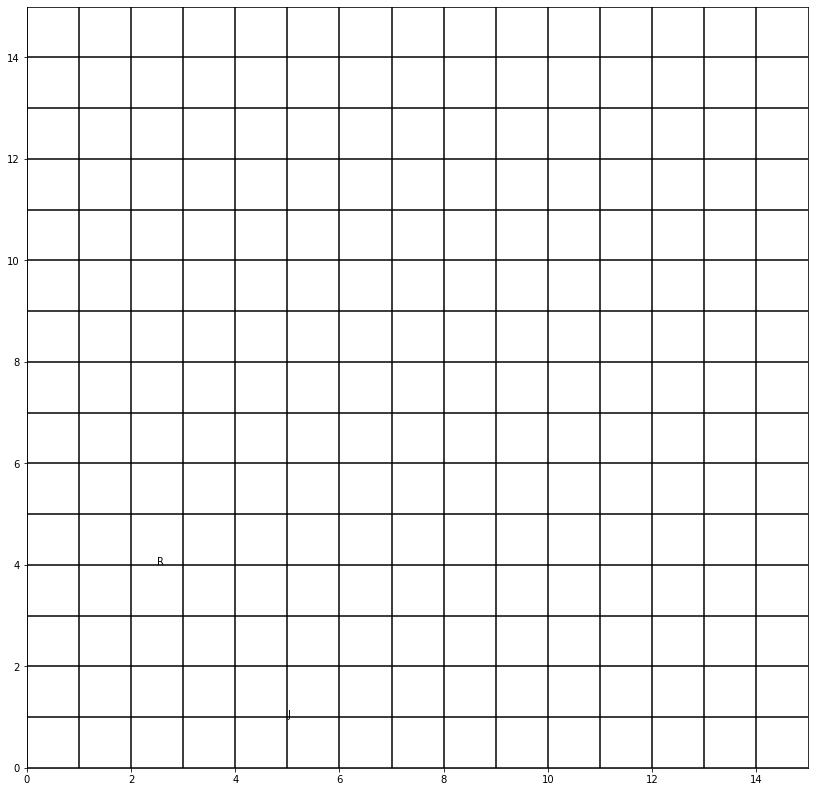

In [ ]:
tablero.mostrar_tablero_grafico()

In [ ]:
lista2 = list(range(14,-1,-1))
lista2 = list(map(lambda elemento: elemento-0.5, lista2))
print(lista2)

[13.5, 12.5, 11.5, 10.5, 9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5, -0.5]
